In [ ]:
# Sai Triveni Kottapalli
# ID - C00313481  

# k-Nearest Neighbors (kNN)

In the case of KNN, it uses a method of determining the distance between 'k' different points in space and using a voting method to classify, but in this case there is just 1 neighbor and hence I have eliminated the need for complexity by keeping the training algorithm very simple.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

## Load the Breast Cancer dataset

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

### 1. Split the data into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Standardize the features to improve KNN performance

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Use Grid Search to find the best value for `n_neighbors`

In [7]:
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

### 4. Train the KNN model with the best `n_neighbors`

In [8]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for n_neighbors: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best value for n_neighbors: 8


KNeighborsClassifier(n_neighbors=8)

### 5. Make predictions on the test set

In [9]:
y_pred = knn.predict(X_test)

### 6. Evaluate the model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


### Classification report

In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### 7. Confusion matrix

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

### Visualize the confusion matrix using a heatmap

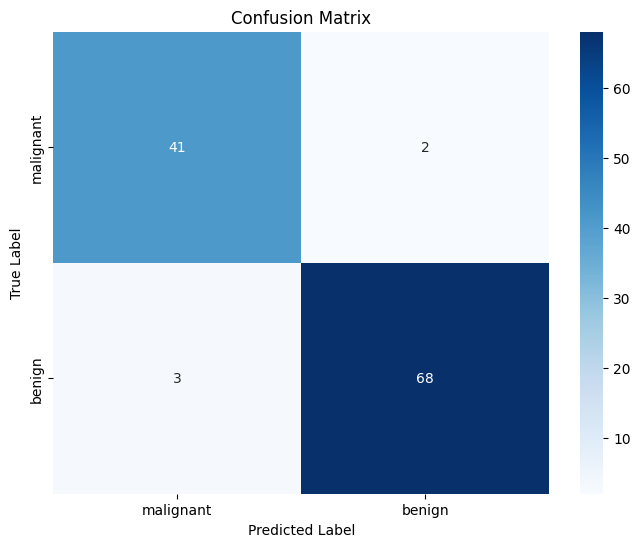

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()